In [5]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [6]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_library(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(100, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_library(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [7]:
results = research_minibatch_calculation(n_tests=100)

100%|██████████| 401/401 [03:28<00:00,  1.93it/s]


In [8]:
print(results)

[22.29, 22.02, 21.86, 21.69, 21.36, 21.21, 20.99, 20.85, 20.7, 20.44, 20.21, 20.1, 20.03, 19.81, 19.55, 19.51, 19.28, 19.04, 19.03, 18.86, 18.85, 18.56, 18.33, 18.24, 18.09, 17.98, 17.97, 17.83, 17.6, 17.32, 17.25, 17.14, 17.01, 16.99, 16.93, 16.82, 16.57, 16.48, 16.24, 16.23, 16.08, 16.02, 15.97, 15.89, 15.9, 15.67, 15.52, 15.39, 15.24, 15.15, 15.03, 15.01, 14.99, 14.93, 14.84, 14.78, 14.6, 14.44, 14.35, 14.15, 14.14, 14.02, 14.03, 14.01, 13.96, 13.94, 13.95, 13.84, 13.78, 13.49, 13.41, 13.26, 13.13, 13.08, 13.05, 13.02, 13.01, 12.99, 13.0, 12.97, 12.93, 12.82, 12.79, 12.7, 12.56, 12.37, 12.25, 12.15, 12.09, 12.0, 12.04, 12.01, 12.0, 11.99, 11.99, 12.0, 11.97, 11.97, 11.9, 11.79, 11.77, 11.53, 11.42, 11.28, 11.19, 11.14, 11.08, 11.03, 11.02, 11.02, 11.0, 11.0, 11.0, 11.0, 10.99, 10.99, 10.97, 10.97, 10.96, 10.94, 10.83, 10.7, 10.55, 10.37, 10.3, 10.12, 10.09, 10.1, 10.01, 10.02, 10.01, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.99, 9.99, 9.98, 9.97, 9.96, 9.92, 9.9, 9.8, 9.73, 9.71, 

In [9]:
def research_minibatch_view(results):

    # График n_epochs
    X = np.linspace(100, len(results) + 100, len(results))
    plt.plot(X, results, marker='o', linewidth=3, markersize=3, label='Minibatch GD')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    # plt.savefig('T1.png', dpi=2048, bbox_inches=0, transparent=True)

    plt.show()

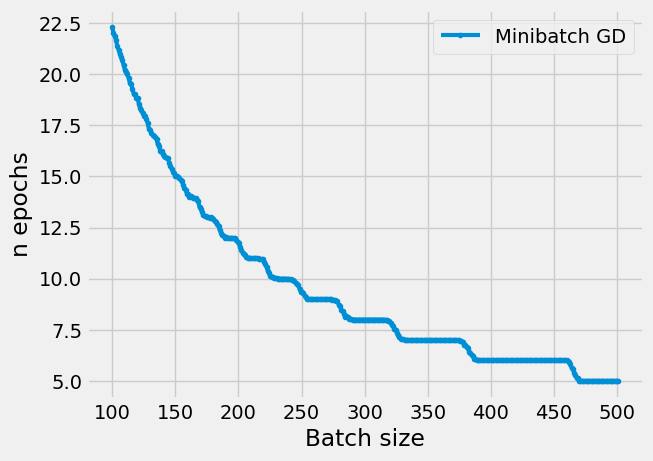

In [10]:
research_minibatch_view(results)

In [19]:
with open('T1.txt', 'w') as file:
    for i in range(100, len(results) + 100):
        file.write(('%d - %g' + "\n") % (i, results[i-100]))